In [5]:
from pystan import StanModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
df = pd.read_csv('data-salary.txt')
data = df.to_dict(orient='list')
data['N'] = len(df)
X_new =list(np.arange(23, 61))
data['X_new'] = X_new
data['N_new'] = len(X_new)
data;

In [7]:
stanmodel = StanModel(file='model4-4_vec.stan')

In [76]:
fit = stanmodel.sampling(data=data, seed=123, iter=2000, thin = 1, warmup=300, n_jobs=-1)

In [9]:
fit

Inference for Stan model: anon_model_99dd299d0986335a329101cc0743d057.
4 chains, each with iter=2000; warmup=300; thin=1; 
post-warmup draws per chain=1700, total post-warmup draws=6800.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a              -120.4    1.65  76.37 -272.0 -170.0 -120.3 -71.26  28.93   2145    1.0
b               21.93    0.04   1.71  18.55  20.85  21.94  23.04  25.33   2114    1.0
sigma           85.27     0.3  15.38   61.4  74.51  82.97  93.71 121.96   2609    1.0
y_base[0]      405.83    0.78  38.18 329.23 381.01 405.63 430.64 481.35   2417    1.0
y_base[1]      405.83    0.78  38.18 329.23 381.01 405.63 430.64 481.35   2417    1.0
y_base[2]      449.69    0.71  35.29 379.03 426.63 449.59 472.62  519.3   2497    1.0
y_base[3]      581.26     0.5  27.36  526.6  563.7  581.3 598.83 635.48   2981    1.0
y_base[4]      603.19    0.47   26.2 550.97  586.3 603.13 620.16 655.18   3127    1.0
y_base[5]      647.05    0.41  24.07 5

In [10]:
from scipy.stats import gaussian_kde
def find_map(data):
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 501)
    eval_kde = kde.evaluate(x_range)
    return x_range[np.argmax(eval_kde)]

In [90]:
map = []
for i in fit.model_pars:
    print(i)
    if i in fit.constrained_param_names() or i == 'lp__':
        map.append(find_map(fit[i]))
    else:
        for j in range(0, fit[i].shape[1]):
            map.append(find_map(fit[i][:, j]))

a
b
sigma
y_base
y_base_new
y_new
lp__


In [93]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [95]:
fitdf = stanfit_to_dataframe(fit)
fitdf['map'] = map
fitdf

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,map
a,-120.457001,1.649029,76.373372,-272.000660,-170.092648,-120.383102,-71.257690,28.932955,2145.0,1.002058,-118.484065
b,21.928643,0.037205,1.710629,18.551167,20.853113,21.944104,23.041075,25.331743,2114.0,1.002301,22.082661
sigma,85.271844,0.301113,15.380337,61.395668,74.506563,82.973931,93.712640,121.958378,2609.0,1.000113,78.550002
y_base[0],405.830435,0.776668,38.183310,329.234018,381.009577,405.632800,430.635349,481.351948,2417.0,1.001507,403.957431
y_base[1],405.830435,0.776668,38.183310,329.234018,381.009577,405.632800,430.635349,481.351948,2417.0,1.001507,403.957431
y_base[2],449.687722,0.706272,35.292393,379.030648,426.628395,449.586149,472.619368,519.298615,2497.0,1.001389,448.221620
y_base[3],581.259581,0.501182,27.363781,526.602133,563.695517,581.297602,598.828969,635.479880,2981.0,1.000873,582.121416
y_base[4],603.188224,0.468538,26.200461,550.972394,586.304279,603.128082,620.155269,655.180324,3127.0,1.000759,603.538062
y_base[5],647.045510,0.405538,24.070667,599.025116,631.585773,646.974501,662.801560,694.959763,3523.0,1.000512,645.655673
y_base[6],712.831440,0.320229,21.510231,670.482342,698.965911,712.788673,726.806435,755.137650,4512.0,1.000133,711.501348


In [97]:
fitdf_y_base_new = fitdf.loc['y_base_new[0]': 'y_base_new[37]']
fitdf_y_new = fitdf.loc['y_new[0]': 'y_new[37]']
fitdf_y_base = fitdf.loc['y_base[0]': 'y_base[19]']

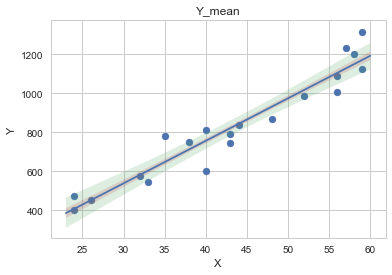

In [21]:
plt.plot(X_new, fitdf_y_base_new['mean'])
plt.scatter(data['X'], data['Y'])
plt.fill_between(X_new, fitdf_y_base_new['2.5%'],  fitdf_y_base_new['97.5%'], alpha=0.2)
plt.fill_between(X_new, fitdf_y_base_new['25%'],  fitdf_y_base_new['75%'], alpha=0.2)
plt.title("Y_mean")
plt.xlabel('X')
plt.ylabel('Y');

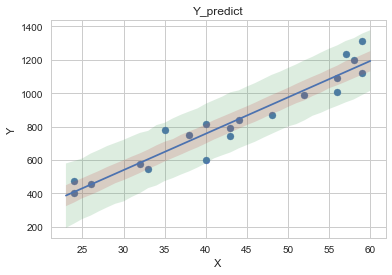

In [22]:
plt.plot(X_new, fitdf_y_base_new['mean'])
plt.scatter(data['X'], data['Y'])
plt.fill_between(X_new, fitdf_y_new['2.5%'],  fitdf_y_new['97.5%'], alpha=0.2)
plt.fill_between(X_new, fitdf_y_new['25%'],  fitdf_y_new['75%'], alpha=0.2)
plt.title('Y_predict')
plt.xlabel('X')
plt.ylabel('Y');

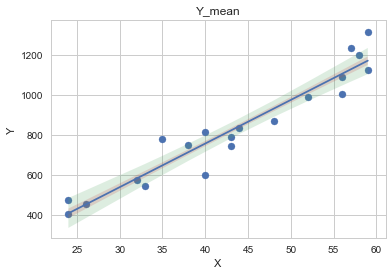

In [18]:
plt.plot(data['X'], fitdf_y_base['mean'])
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X'], fitdf_y_base['2.5%'],  fitdf_y_base['97.5%'], alpha=0.2)
plt.fill_between(data['X'], fitdf_y_base['25%'],  fitdf_y_base['75%'], alpha=0.2)
plt.title("Y_mean")
plt.xlabel('X')
plt.ylabel('Y');

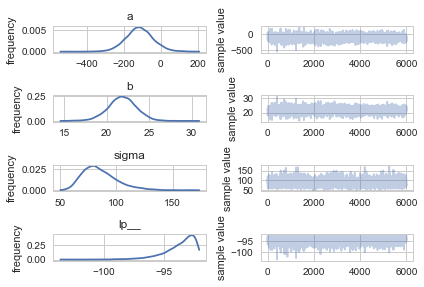

In [22]:
fit.traceplot(pars=['a', 'b', 'sigma','lp__']).tight_layout()

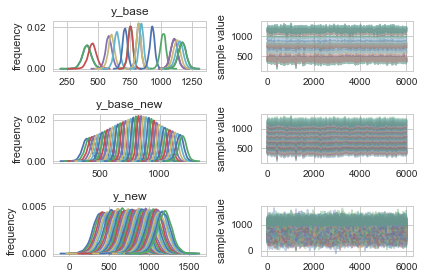

In [21]:
fit.traceplot(pars=['y_base', 'y_base_new', 'y_new']).tight_layout()

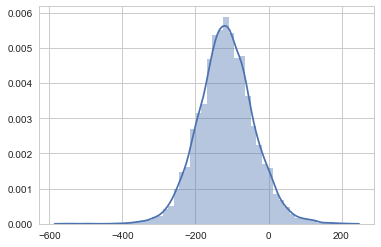

In [25]:
sns.distplot(fit['a']);

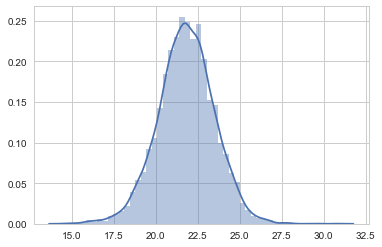

In [24]:
sns.distplot(fit['b']);

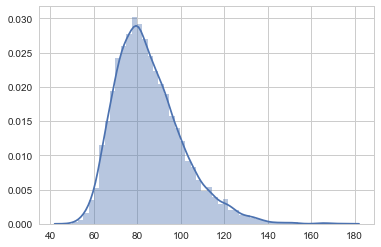

In [23]:
sns.distplot(fit['sigma']);

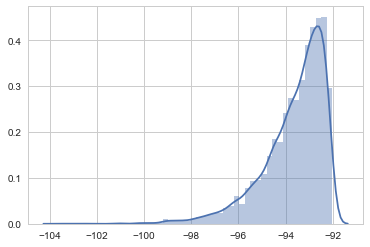

In [26]:
sns.distplot(fit['lp__']);

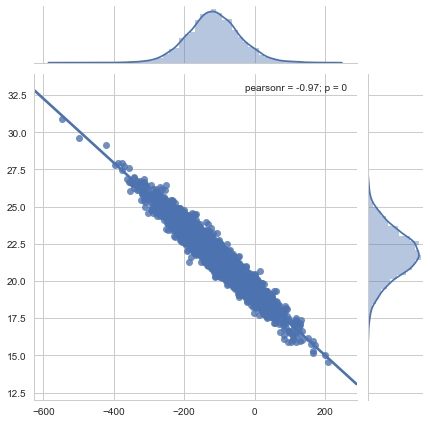

In [37]:
sns.jointplot(x=fit['a'],y= fit['b'], kind='reg')